In [1]:
!pip install tensorflow

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/face-mask-dataset


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [5]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
#installing dependicies

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask = os.listdir("/content/data/with_mask")
print(with_mask[:5])

without_mask = os.listdir("/content/data/without_mask")
print(without_mask[:5])


['with_mask_3104.jpg', 'with_mask_3073.jpg', 'with_mask_1381.jpg', 'with_mask_2269.jpg', 'with_mask_2741.jpg']
['without_mask_3444.jpg', 'without_mask_3233.jpg', 'without_mask_2611.jpg', 'without_mask_1598.jpg', 'without_mask_1196.jpg']


In [8]:
print(len(with_mask))
print(len(without_mask))

3725
3828


with_mask = 1
without_mask = 0

In [9]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[:5])
print(without_mask_label[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
labels = with_mask_label + without_mask_label
print(len(labels))

7553


Displaying Image

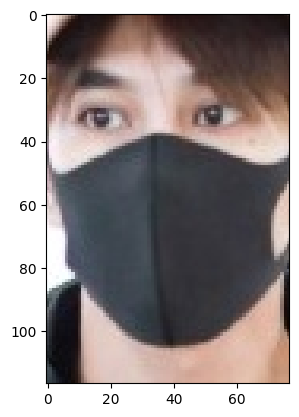

In [11]:
img = mpimg.imread("/content/data/with_mask/with_mask_120.jpg")
imgplot = plt.imshow(img)
plt.show()

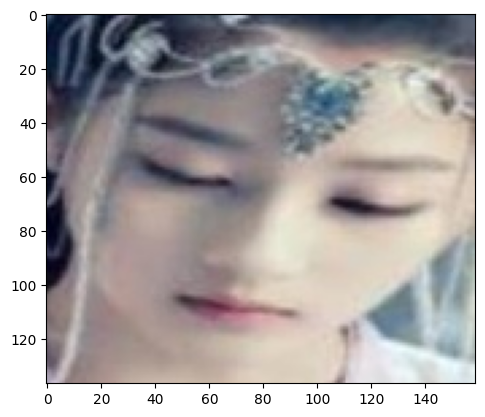

In [12]:
img = mpimg.imread("/content/data/without_mask/without_mask_125.jpg")
imgplot = plt.imshow(img)
plt.show()

Image Processing


1. Resizing Image
2. Convert Image to Numpy Array

In [13]:
with_mask_path= "/content/data/with_mask/"

data=[]

for img_file in with_mask:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((100,100))
  image = image.convert("RGB")
  image = np.array(image)

  data.append(image)



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
len(data)

3725

In [15]:
without_mask_path= "/content/data/without_mask/"

for img_file in without_mask:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((100,100))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


In [16]:
len(data)

7553

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(100, 100, 3)

In [19]:
X = np.array(data)
Y =np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)


(7553, 100, 100, 3)
(7553,)


In [21]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X_train.shape,X_test.shape)
print(Y_test.shape,Y_test.shape)

(6042, 100, 100, 3) (1511, 100, 100, 3)
(1511,) (1511,)


In [24]:
# Scaling Data

X_train_scaled = X_train/255
X_test_scaled =  X_test/255



Building CNN


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [26]:
number_of_classes = 2

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(100,100,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(number_of_classes, activation='sigmoid')  # or 'softmax' if categorical
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,690 (401.13 KB)

 Trainable params: 102,690 (401.13 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [29]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1, epochs=20)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - acc: 0.6655 - loss: 0.5618 - val_acc: 0.8860 - val_loss: 0.2934
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - acc: 0.9097 - loss: 0.2554 - val_acc: 0.9223 - val_loss: 0.2126
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.9311 - loss: 0.1920 - val_acc: 0.9124 - val_loss: 0.2614
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.9409 - loss: 0.1716 - val_acc: 0.9322 - val_loss: 0.1779
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.9545 - loss: 0.1294 - val_acc: 0.9289 - val_loss: 0.1562
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9602 - loss: 0.1045 - val_acc: 0.9339 - val_loss: 0.1593
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.9611 - loss: 0.1151 - val_acc: 0.9438 - val_loss: 0.1372
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.9604 - loss: 0.1233 - val_acc: 0.9306 - val_loss: 0.1507
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

In [30]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("accuracy:",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9719 - loss: 0.0954
accuracy: 0.9708802103996277


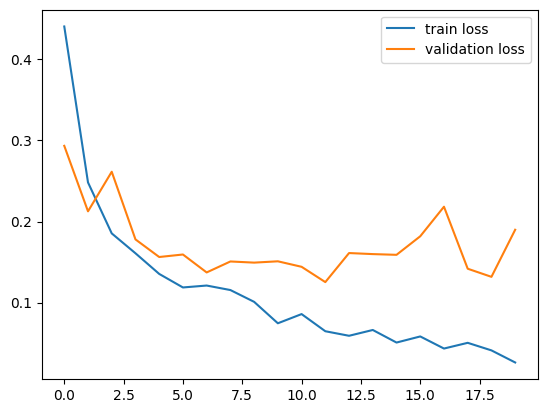

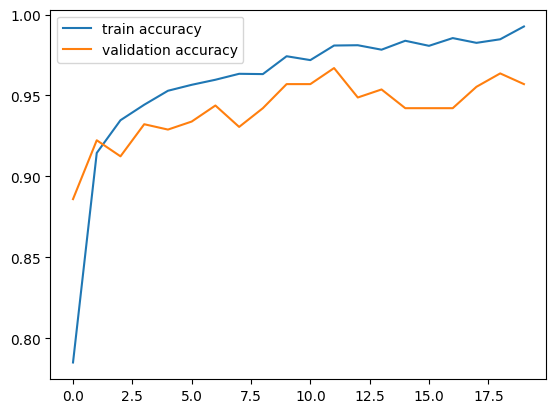

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [32]:
model.save('mask_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


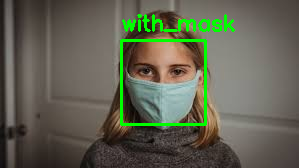

In [34]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
import tensorflow as tf

# Load the pre-trained face detection model (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the trained mask detection model
model = load_model('mask_detection_model.h5')  # Update this path if necessary

# Function to preprocess the image for the mask detection model
def preprocess_image(img):
    img = cv2.resize(img, (100 , 100))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to detect faces and classify them as with or without mask
def detect_and_classify_mask(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over each detected face
    for (x, y, w, h) in faces:
        # Extract the face region of interest (ROI)
        face_roi = img[y:y+h, x:x+w]

        # Preprocess the face ROI for the mask detection model
        processed_face = preprocess_image(face_roi)

        # Predict whether the person is wearing a mask or not
        try:
            prediction = model.predict(processed_face)[0][0]
        except ValueError as e:
            print(f"Error during prediction: {e}")
            print(f"Shape of processed_face: {processed_face.shape}")
            continue  # Skip to the next face if there's an error with this one.

        # Determine the class label and color based on the prediction
        if prediction > 0.5:
            label = "with_mask"
            color = (0, 255, 0)  # Green for with_mask
        else:
            label = "without_mask"
            color = (0, 0, 255)  # Red for without_mask

        # Draw a rectangle around the face and display the label and confidence
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    # Display the image with the detected faces and labels
    cv2_imshow(img)


# Example usage:
image_path = "/content/download.jpeg"  # Replace with the path to your image
detect_and_classify_mask(image_path)

